pip install matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import plotly.offline as py
import seaborn as sns # for making plots with seaborn
from pylab import rcParams

from matplotlib_venn import venn3, venn3_circles
from matplotlib_venn_wordcloud import venn3_wordcloud

%matplotlib inline

rcParams["axes.labelsize"] = 15
rcParams['figure.figsize'] = 12,12
rcParams['figure.titlesize'] = 30


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
sns.set(rc={'figure.figsize':(20,15)})

import plotly.offline as py
py.init_notebook_mode(connected=True) # use the latest version of JS library
import plotly.graph_objs as go

import plotly
import plotly.figure_factory as ff
import cufflinks as cf

import warnings
warnings.filterwarnings('ignore')

from pylab import rcParams
rcParams['figure.figsize'] = 20,20
rcParams["axes.labelsize"] = 15
from scipy.stats import norm 

%matplotlib inline

In [2]:
# Let's explore the dataset that we've got
Data_Folder = 'Data'
data = pd.read_csv('{}\\{:02d}_app_data_processed.csv'.format(Data_Folder,8))

In [3]:
data.shape

(109923, 82)

In [4]:
data.columns

Index(['adSupported', 'androidVersion', 'appId', 'containsAds', 'description',
       'free', 'headerImage', 'icon', 'minInstalls', 'offersIAP', 'price',
       'rating1', 'rating2', 'rating3', 'rating4', 'rating5', 'ratings',
       'recentChanges', 'released', 'reviews', 'sale', 'score', 'size',
       'summary', 'title', 'updated', 'contentRating_Adults only 18+',
       'contentRating_Everyone', 'contentRating_Everyone 10+',
       'contentRating_Mature 17+', 'contentRating_Rated for 12+',
       'contentRating_Rated for 3+', 'contentRating_Teen',
       'genreId_ART_AND_DESIGN', 'genreId_AUTO_AND_VEHICLES', 'genreId_BEAUTY',
       'genreId_BOOKS_AND_REFERENCE', 'genreId_BUSINESS', 'genreId_COMICS',
       'genreId_COMMUNICATION', 'genreId_DATING', 'genreId_EDUCATION',
       'genreId_ENTERTAINMENT', 'genreId_EVENTS', 'genreId_FINANCE',
       'genreId_FOOD_AND_DRINK', 'genreId_GAME_ACTION',
       'genreId_GAME_ADVENTURE', 'genreId_GAME_ARCADE', 'genreId_GAME_BOARD',
       'genr

In [5]:
# Load original dataset, before cleaning, as we might need some dropped features from there
orig_data = pd.read_csv('{}\\{:02d}_app_base_data.csv'.format(Data_Folder,5))

In [6]:
orig_data.shape

(123460, 42)

In [7]:
orig_data.columns

Index(['adSupported', 'androidVersion', 'appId', 'containsAds',
       'contentRating', 'contentRatingDescription', 'currency', 'description',
       'developer', 'developerAddress', 'developerId', 'developerWebsite',
       'free', 'genreId', 'headerImage', 'icon', 'minInstalls', 'offersIAP',
       'originalPrice', 'price', 'privacyPolicy', 'rating1', 'rating2',
       'rating3', 'rating4', 'rating5', 'ratings', 'recentChanges', 'released',
       'reviews', 'sale', 'saleText', 'saleTime', 'score', 'size', 'summary',
       'title', 'updated', 'url', 'version', 'video', 'videoImage'],
      dtype='object')

In [8]:
# Let's see the correlation between features
corr = data.corr().abs()

In [9]:
corr

adSupported  androidVersion  containsAds      free  \
adSupported                  1.000000        0.039157     1.000000  0.284511   
androidVersion               0.039157        1.000000     0.039157  0.123699   
containsAds                  1.000000        0.039157     1.000000  0.284511   
free                         0.284511        0.123699     0.284511  1.000000   
minInstalls                  0.006855        0.048570     0.006855  0.013193   
...                               ...             ...          ...       ...   
genreId_SPORTS               0.003274        0.009624     0.003274  0.006722   
genreId_TOOLS                0.050817        0.031383     0.050817  0.032759   
genreId_TRAVEL_AND_LOCAL     0.047802        0.024412     0.047802  0.034402   
genreId_VIDEO_PLAYERS        0.003731        0.003630     0.003731  0.003943   
genreId_WEATHER              0.037531        0.061932     0.037531  0.001295   

                          minInstalls  offersIAP     price   rating1  \
adSupported                  0.006855   0.290209  0.113648  0.149387   
androidVersion               0.048570   0.016021  0.035077  0.061171   
containsAds                  0.006855   0.290209  0.113648  0.149387   
free                         0.013193   0.150321  0.388515  0.084821   
minInstalls                  1.000000   0.004199  0.005141  0.006128   
...                               ...        ...       ...       ...   
genreId_SPORTS               0.004575   0.008779  0.006218  0.003278   
genreId_TOOLS                0.013384   0.061173  0.009438  0.026257   
genreId_TRAVEL_AND_LOCAL     0.001615   0.033550  0.010936  0.029854   
genreId_VIDEO_PLAYERS        0.020764   0.008266  0.003155  0.034629   
genreId_WEATHER              0.002090   0.017051  0.006877  0.013715   

                           rating2   rating3  ...  genreId_PERSONALIZATION  \
adSupported               0.089151  0.017767  ...                 0.022652   
androidVersion            0.018749  0.038028  ...                 0.038681   
containsAds               0.089151  0.017767  ...                 0.022652   
free                      0.010935  0.017599  ...                 0.126419   
minInstalls               0.005629  0.001399  ...                 0.005415   
...                            ...       ...  ...                      ...   
genreId_SPORTS            0.011258  0.012169  ...                 0.029015   
genreId_TOOLS             0.004753  0.002558  ...                 0.056128   
genreId_TRAVEL_AND_LOCAL  0.008648  0.019802  ...                 0.033656   
genreId_VIDEO_PLAYERS     0.007267  0.004139  ...                 0.020225   
genreId_WEATHER           0.013419  0.005813  ...                 0.019104   

                          genreId_PHOTOGRAPHY  genreId_PRODUCTIVITY  \
adSupported                          0.024898              0.086129   
androidVersion                       0.005878              0.004397   
containsAds                          0.024898              0.086129   
free                                 0.009387              0.015208   
minInstalls                          0.006679              0.010613   
...                                       ...                   ...   
genreId_SPORTS                       0.018554              0.027834   
genreId_TOOLS                        0.035892              0.053842   
genreId_TRAVEL_AND_LOCAL             0.021522              0.032285   
genreId_VIDEO_PLAYERS                0.012933              0.019402   
genreId_WEATHER                      0.012216              0.018326   

                          genreId_SHOPPING  genreId_SOCIAL  genreId_SPORTS  \
adSupported                       0.081840        0.034047        0.003274   
androidVersion                    0.034909        0.019148        0.009624   
containsAds                       0.081840        0.034047        0.003274   
free                              0.035192        0.034401        0.006722   
minInstalls         

In [10]:
# As we have many features, 
# let's drop from correlation matrix those rows and columns that do not contain high correlation values
for col in corr.columns:
    drop = True
    for row in corr.index:
        if corr[col][row] > 0.2 and col!=row :
            drop = False
            break
    if drop:
        corr.drop(columns = [col], inplace = True)
        corr.drop([col], inplace = True)        

In [11]:
corr.shape

(25, 25)

Text(0.5, 1.0, 'Features correlation matrix (corr>0.2)')

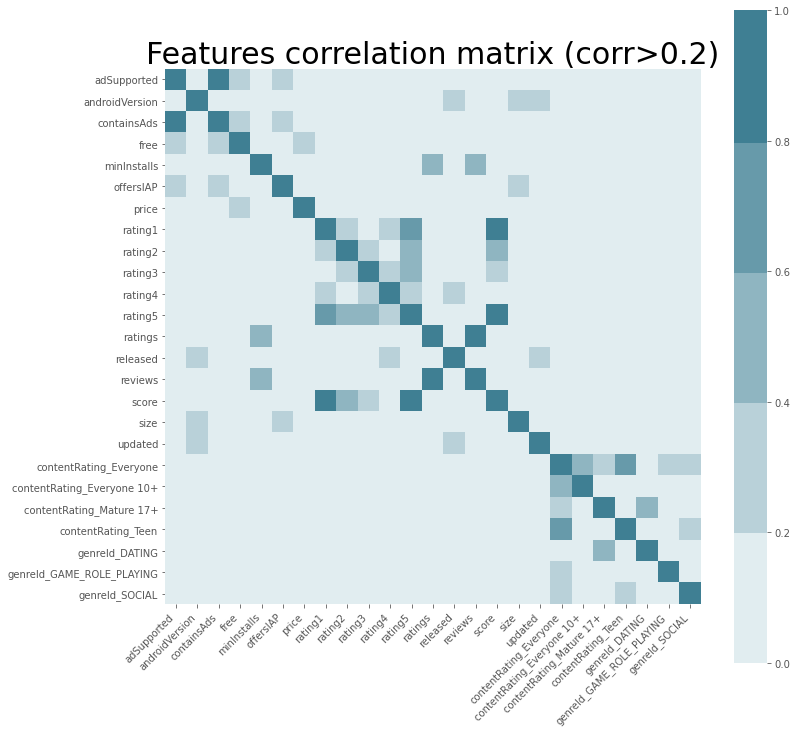

In [12]:
# Let's visualise our correlation matrix
ax = sns.heatmap(
    corr, 
    vmin=0, vmax=1, center=0, 
    cmap=sns.diverging_palette(20, 220, n=10),
    square=True
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Features correlation matrix (corr>0.2)',size = 30)

In [13]:
# We can see that there is a very high correlation between 
# 'adSupported' and 'containAds'
# 'reviews' and 'ratings'
# 'score' and 'rating5'
# 'score' and 'rating1'
# 'score' is obviously could be derived from rating1, ..., rating5 values, that explaing high correlation,
# however we will keep this field so far for EDA purposes

Text(0.5, 1.0, 'Distribution of Average App Rating')

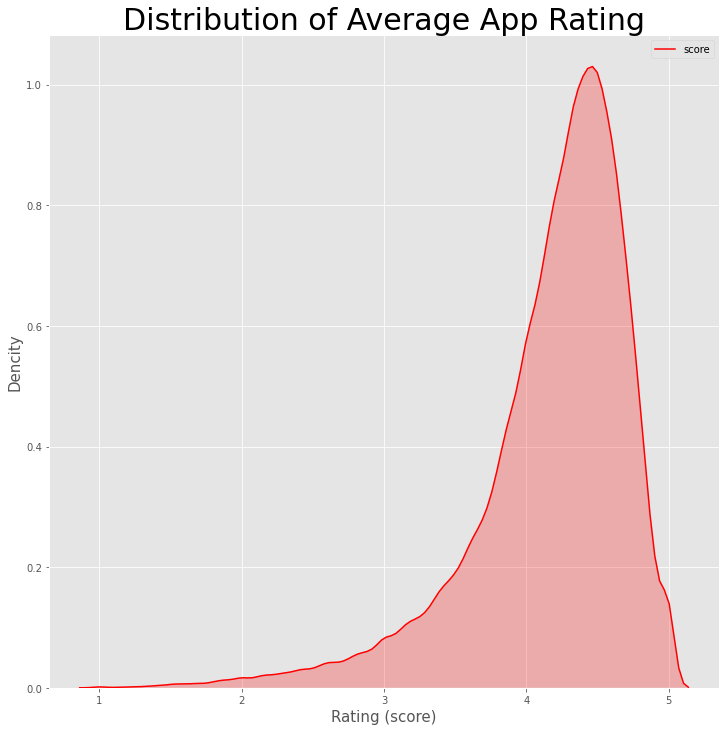

In [14]:
# Now let's see some plots
# First let's plot the distribution of app rating or app score
g = sns.kdeplot(data.score, color="Red", shade = True)
g.set_xlabel("Rating (score)")
g.set_ylabel("Dencity")
plt.title('Distribution of Average App Rating',size = 30)

In [15]:
data.score.describe()

count    109923.000000
mean          4.173812
std           0.548711
min           1.000000
25%           3.948718
50%           4.299576
75%           4.544661
max           5.000000
Name: score, dtype: float64

Text(0.5, 1.0, 'Number of installs')

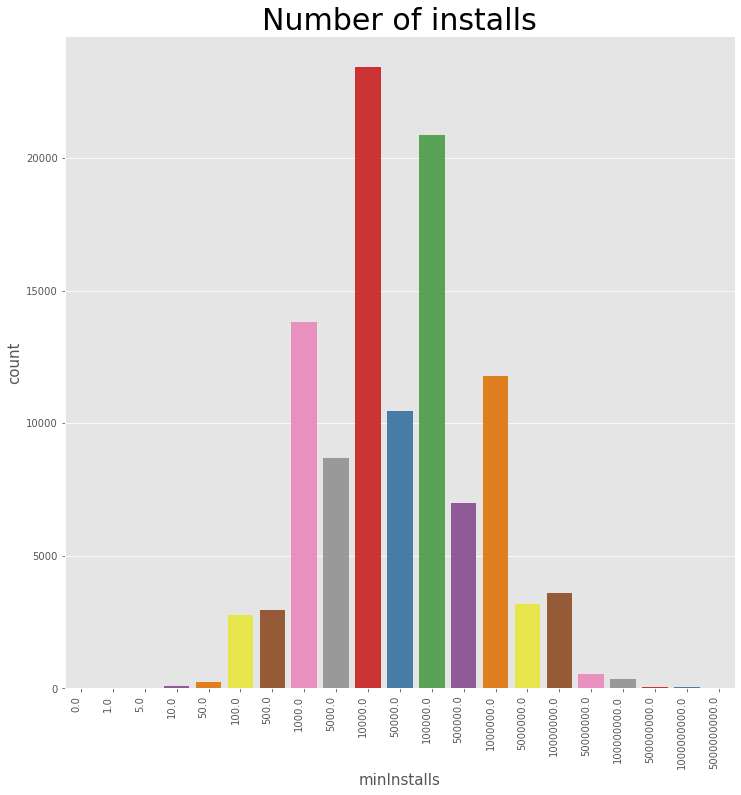

In [16]:
g = sns.countplot(x="minInstalls",data=data, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Number of installs',size = 30)

In [17]:
# We can see that a vast majority of apps have number of installs between 10K and 100K

In [18]:
data['size'].describe()

count    109923.000000
mean      25515.438941
std       28252.426184
min           0.000000
25%        5222.400000
50%       15360.000000
75%       37888.000000
max      879616.000000
Name: size, dtype: float64

In [19]:
# Let's return genreId and contentRating columns for more plots
data = pd.merge(data,orig_data[['genreId','appId']],on='appId')

In [20]:
data = pd.merge(data,orig_data[['contentRating','appId']],on='appId')

Text(0.5, 1.0, 'Count of app in each category')

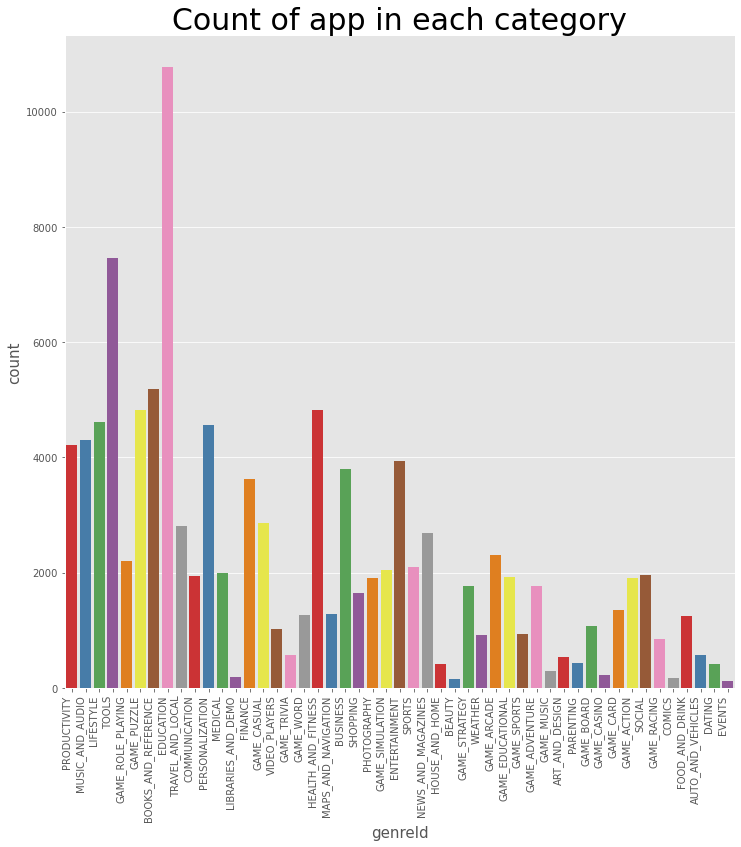

In [21]:
# What is the distribution of the apps across categories?
g = sns.countplot(x="genreId",data=data, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Count of app in each category',size = 30)

Text(0.5, 1.0, 'Count of app in each category')

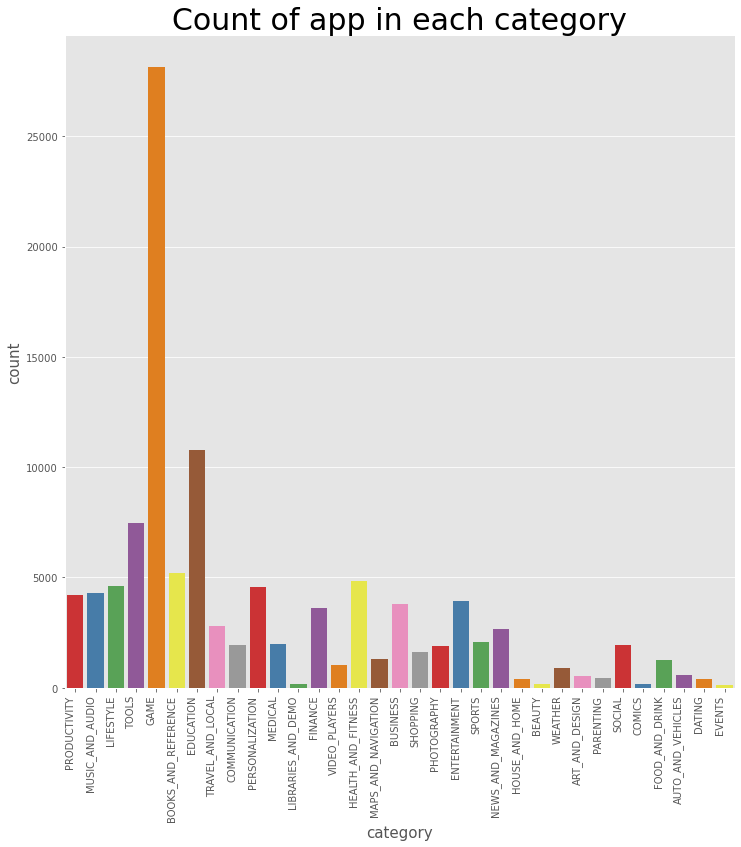

In [22]:
# We can see that most of the apps are in 'Education' category, 
# however if we group together all games, it will be the winner for sure
data['category'] = data['genreId'].str.replace(r'GAME.*','GAME')
g = sns.countplot(x="category",data=data, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Count of app in each category',size = 30)

In [23]:
# Here we visualize app rating distribution throughout categories 
groupped = data.groupby('category')['score'].apply(np.mean).sort_values(ascending=False)

layout = {'title' : {'text': "App ratings across categories in mean descending order",
                     'font': {'size':30}
                    },
          'xaxis': {'tickangle':-40},
          'yaxis': {'title': 'Rating'},
          'plot_bgcolor': 'rgb(250,250,250)',
          'shapes':              # Group means
              [{
              'type' :'line',
              'x0': i-0.5,
              'y0': m,
              'x1': i+0.5,
              'y1': m,
              'line': {'color': 'red'}
              } for i,m in enumerate(groupped.values)]
          }
# Overall mean
layout['shapes'].append({
              'type' :'line',
              'x0': -0.5,
              'y0': np.nanmean(groupped.values),
              'x1': len(groupped.index)-1.5,
              'y1': np.nanmean(groupped.values),
              'line': {'dash': 'dot', 'color': 'RoyalBlue'}
              })
plotdata = [{
    'y': data.loc[data.category==cat]['score'], 
    'type':'violin',
    'name' : cat,
    'showlegend':False
    } for cat in groupped.index]

py.iplot({'data': plotdata, 'layout': layout})

In [24]:
# We see that users usually give higher rating to 'PERSONALIZATION' and 'BEAUTY' apps 
# - there are no apps with 1 star at all.
# Highest average rating though is in 'BOOKS_AND REFERENCE' category
# 'COMICS' group does not have 1 star ratings, but it's average is on the lower end of the chart comparing with other groups

Text(0.5, 1.0, 'Distribution of App Total earinings (magnitude of 10)')

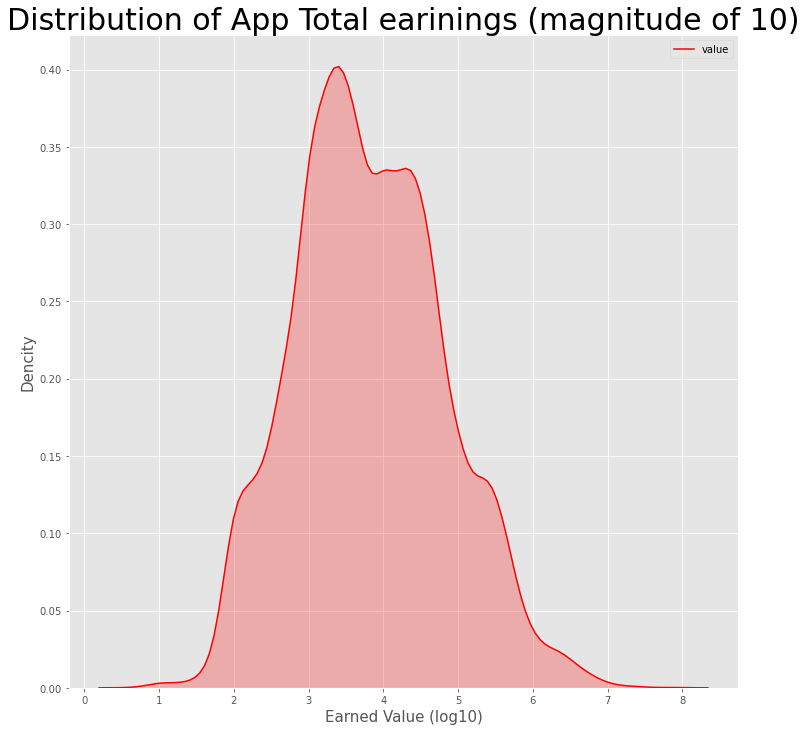

In [41]:
# Now, let's see the money that app earns directly, i.e. from app sale only
data['value'] = data['price'] * data['minInstalls']

# Let's pring distribution plot based on logarithmic scale 
# and excluding apps with vavue = 0 (price is zero or no installations)
g = sns.kdeplot(np.log10(data[data.value>0].value), color="Red", shade = True)
g.set_xlabel("Earned Value (log10)")
g.set_ylabel("Dencity")
plt.title('Distribution of App Total earinings (magnitude of 10)',size = 30)

In [26]:
# We can see, that if app is paid there is a very good chance to hit 1000 - 50'000 $$ of total earnings
# With the maximum value well over 10M $$ !!!

In [53]:
data['value'].describe()

count    1.099230e+05
mean     1.056519e+04
std      2.879359e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      6.990000e+07
Name: value, dtype: float64

In [27]:
# Now, let's see what is per category breakdown. 
groupped = data[(data.value>0)].groupby('category')['value'].apply(np.mean).sort_values(ascending=False)

layout = {'title' : {'text': "App total earninigs (USD$ ,log10) across categories <br>in mean descending order",
                     'font': {'size':30}
                    },
          'xaxis': {'tickangle':-40},
          'yaxis': {'title': 'value'},
          'plot_bgcolor': 'rgb(250,250,250)',
          'shapes': 
              [{
              'type' :'line',
              'x0': i-0.5,
              'y0': np.log10(m),
              'x1': i+0.5,
              'y1': np.log10(m),
              'line': { 'dash': 'dot','color':'red'}
              } for i,m in enumerate(groupped.values)]
          }

plotdata = [{
    'y': np.log10(data.loc[(data.category==cat)&(data.value>0)]['value']), 
    'type':'violin',
    'name' : cat,
    'showlegend':False
    } for cat in groupped.index]

py.iplot({'data': plotdata, 'layout': layout})

In [28]:
# We see that regardless that most valued app is located in 'GAME' category, 
# the highest mean of the value falls into 'WEATHER', 'BUSINESS' and 'PHOTOGRAPHY' categories
# 'DATING' category, shows significant drop in average value comparing to other categories
# 'EVENTS' category has only one paid app with any number of installs 

In [29]:
# Category that has the lowest average app value
data[(data.category == 'EVENTS')&(data.value>0)]

adSupported  androidVersion                           appId  \
90916            0             440  de.thegolem.freepcgamespremium   

       containsAds                                        description  free  \
90916            0  Free PC Games premium makes it easy for you to...     0   

                                             headerImage  \
90916  https://lh3.googleusercontent.com/V3w6ec-of8fY...   

                                                    icon  minInstalls  \
90916  https://lh3.googleusercontent.com/S7HFd7NF08X9...         50.0   

       offersIAP  ...  genreId_SOCIAL  genreId_SPORTS  genreId_TOOLS  \
90916          0  ...               0               0              0   

       genreId_TRAVEL_AND_LOCAL  genreId_VIDEO_PLAYERS  genreId_WEATHER  \
90916                         0                      0                0   

       genreId contentRating  category  value  
90916   EVENTS          Teen    EVENTS  224.5  

[1 rows x 86 columns]

In [56]:
# App that earned the most 
data[data.value == np.max(data.value)]

adSupported  androidVersion                   appId  containsAds  \
56590            0               0  com.mojang.minecraftpe            0   

                                             description  free  \
56590  Explore infinite worlds and build everything f...     0   

                                             headerImage  \
56590  https://lh3.googleusercontent.com/yAtZnNL-9Eb5...   

                                                    icon  minInstalls  \
56590  https://lh3.googleusercontent.com/VSwHQjcAttxs...   10000000.0   

       offersIAP  ...  genreId_SOCIAL  genreId_SPORTS  genreId_TOOLS  \
56590          1  ...               0               0              0   

       genreId_TRAVEL_AND_LOCAL  genreId_VIDEO_PLAYERS  genreId_WEATHER  \
56590                         0                      0                0   

           genreId contentRating  category       value  
56590  GAME_ARCADE  Everyone 10+      GAME  69900000.0  

[1 rows x 86 columns]

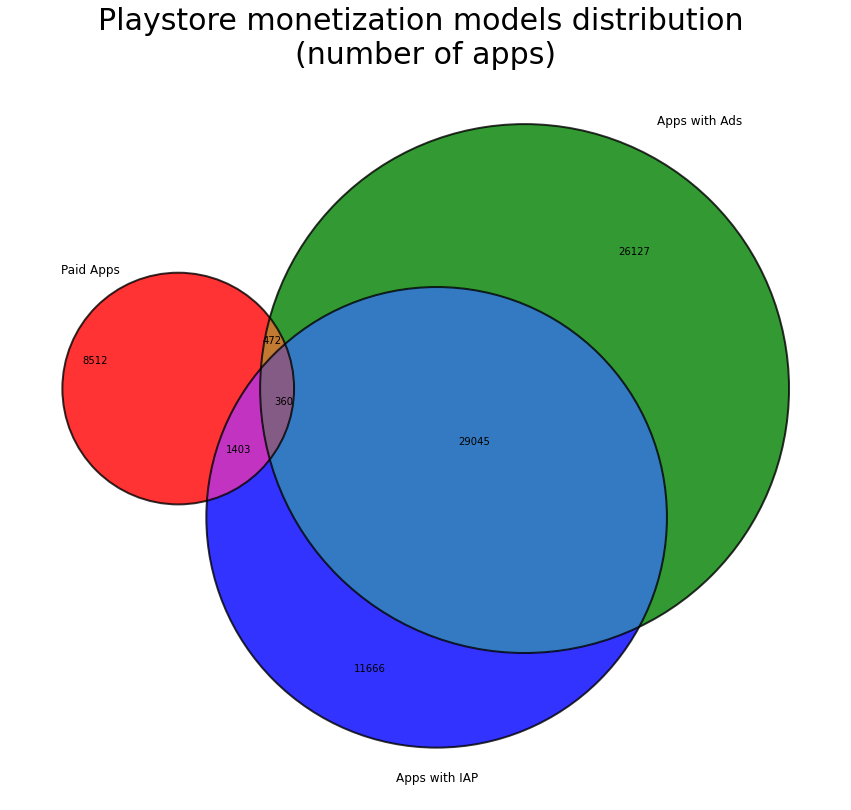

In [30]:
# Now let's see how monetization models are distributed troughout the play store apps
fig, ax = plt.subplots(figsize = (15,15))
ax.set_title('Playstore monetization models distribution \n(number of apps)', fontsize=30)
free_apps = data[data.free==0].index
with_ads = data[data.containsAds==1].index
with_iap = data[data.offersIAP==1].index
venn3([set(free_apps), set(with_ads), set(with_iap)],
          set_labels=['Paid Apps', 'Apps with Ads', 'Apps with IAP'], 
          ax=ax, alpha = 0.8)
venn3_circles([set(free_apps), set(with_ads), set(with_iap)],linestyle='solid', ax=ax, alpha = 0.8)

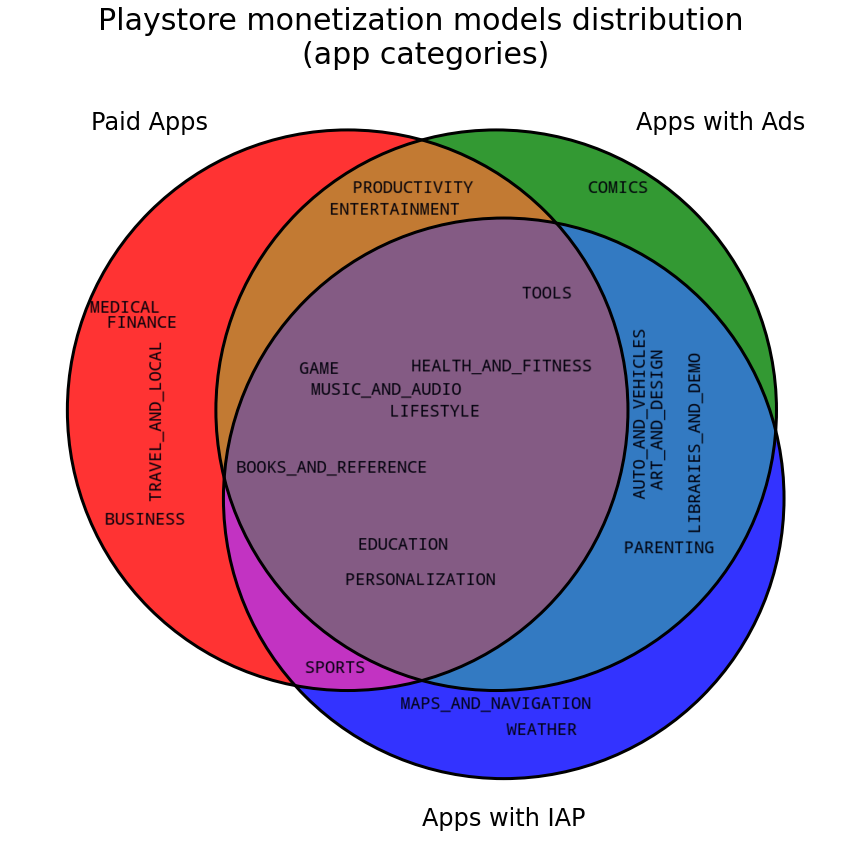

In [31]:
# We saw number of apps, now let's see how monetization models prevail in different categories
fig, ax = plt.subplots(figsize = (15,15))
ax.set_title('Playstore monetization models distribution \n(app categories)', fontsize=30)
fa = data[data.free==0].category.value_counts()
free_apps = (fa.values / data[data.category.isin(fa.index)].category.value_counts()).sort_values().tail(15).index
wa = data[data.containsAds==1].category.value_counts()
with_ads = (wa.values / data[data.category.isin(wa.index)].category.value_counts()).sort_values().tail(15).index
wi = data[data.offersIAP==1].category.value_counts()
with_iap = (wi.values / data[data.category.isin(wi.index)].category.value_counts()).sort_values().tail(15).index

venn3_wordcloud([set(free_apps), set(with_ads), set(with_iap)],
        set_colors=['r','g','b'],
        set_labels=['Paid Apps', 'Apps with Ads', 'Apps with IAP'], 
        ax=ax, alpha = 0.8)

Text(0.5, 1.0, 'Count of apps for each content rating category')

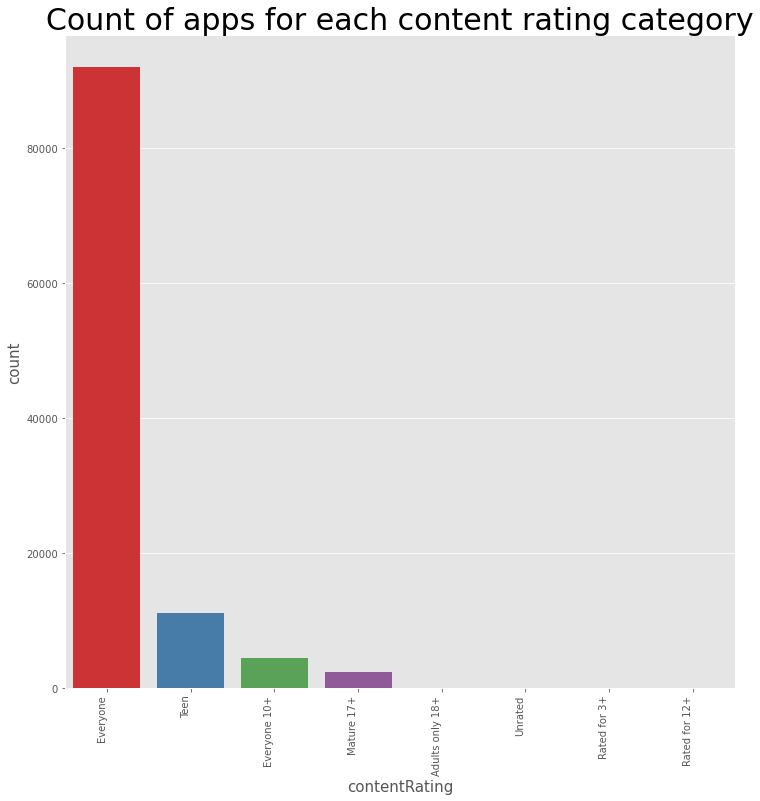

In [32]:
# Next feature to explore is 'contentRating'
# What is the distribution of the apps across content rating?
g = sns.countplot(x="contentRating",
                  data=data,
                  order=data.groupby('contentRating').contentRating.count().sort_values(ascending=False).index,
                  palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Count of apps for each content rating category',size = 30)

Text(0.5, 1.0, 'App value (average) for each content rating category')

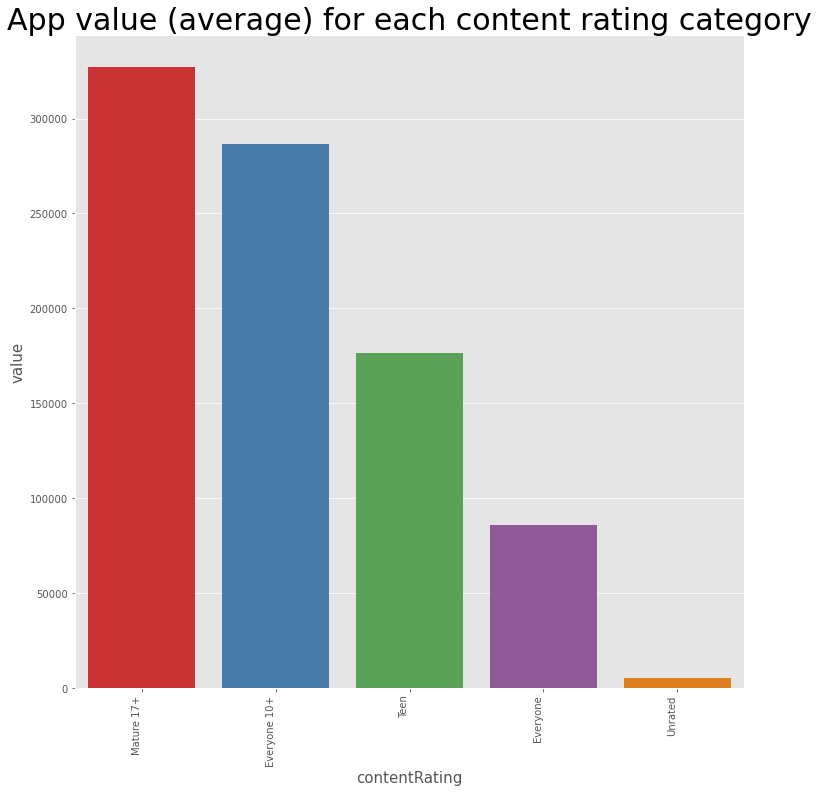

In [57]:
# So, 'Everyone' is the biggest category, but is it the worthiest?
# What is the distribution of the apps value across content rating?
df = pd.DataFrame( \
        data[data.value>0].groupby('contentRating')['value'].apply(np.mean)\
    ).reset_index().sort_values(by="value", ascending=False)
g = sns.barplot(x="contentRating",y="value", data=df, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('App value (average) for each content rating category',size = 30)

Text(0.5, 1.0, 'App value (average) for each \n content rating category')

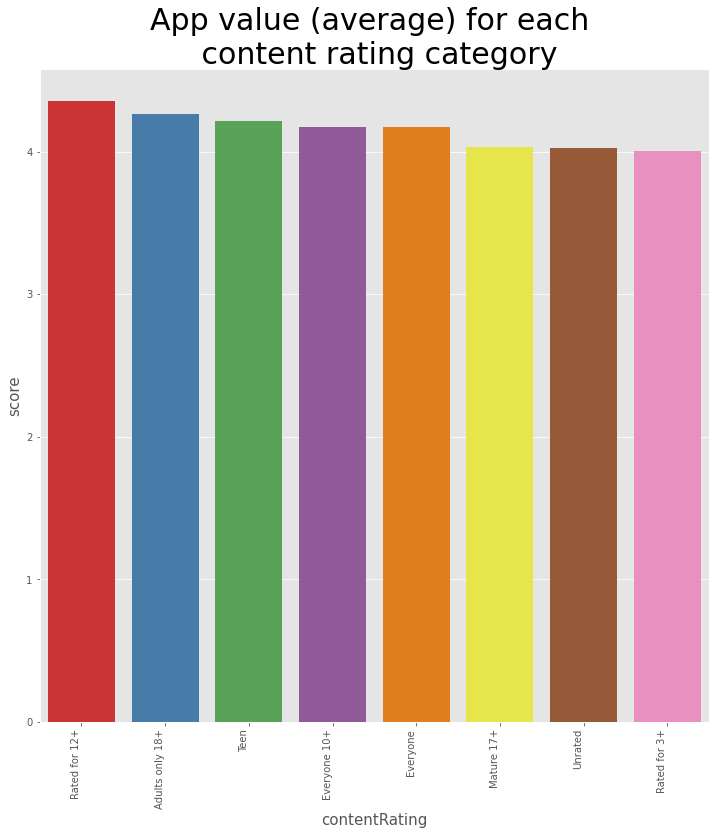

In [34]:
# We see that app value is much higher in "Everyone 10+", "Mature 17+" and "Teen" categories
# "Everyone" category has average app value much lower than those three

# Let's check if app ratings are also differ
df = pd.DataFrame( \
        data.groupby('contentRating')['score'].apply(np.mean)\
    ).reset_index().sort_values(by="score", ascending=False)
g = sns.barplot(x="contentRating",y="score", data=df, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('App value (average) for each \n content rating category',size = 30)

In [35]:
# Average app rating seems does not change a lot for different content rating categories

In [58]:
# Finally, let's see what is per category breakdown for the wealthiest 'Mature 17+'. 
groupped = data[(data.value>0)&(data.contentRating=='Mature 17+')].groupby('category')['value'].apply(np.mean).sort_values(ascending=False)

layout = {'title' : {'text': "App total earninigs (USD$ ,log10) across categories <br>in mean descending order 'Mature 17+'",
                     'font': {'size':30}
                    },
          'xaxis': {'tickangle':-40},
          'yaxis': {'title': 'value'},
          'plot_bgcolor': 'rgb(250,250,250)',
          'shapes': 
              [{
              'type' :'line',
              'x0': i-0.5,
              'y0': np.log10(m),
              'x1': i+0.5,
              'y1': np.log10(m),
              'line': { 'dash': 'dot','color':'red'}
              } for i,m in enumerate(groupped.values)]
          }

plotdata = [{
    'y': np.log10(data.loc[(data.category==cat)&(data.value>0)&(data.contentRating=='Mature 17+')]['value']), 
    'type':'violin',
    'name' : cat,
    'showlegend':False
    } for cat in groupped.index]
py.iplot({'data': plotdata, 'layout': layout})

In [59]:
# Finally, let's see what is per category breakdown for the wealthiest 'Everyone 10+'. 
groupped = data[(data.value>0)&(data.contentRating=='Everyone 10+')].groupby('category')['value'].apply(np.mean).sort_values(ascending=False)

layout = {'title' : {'text': "App total earninigs (USD$ ,log10) across categories <br>in mean descending order 'Everyone 10+'",
                     'font': {'size':30}
                    },
          'xaxis': {'tickangle':-40},
          'yaxis': {'title': 'value'},
          'plot_bgcolor': 'rgb(250,250,250)',
          'shapes': 
              [{
              'type' :'line',
              'x0': i-0.5,
              'y0': np.log10(m),
              'x1': i+0.5,
              'y1': np.log10(m),
              'line': { 'dash': 'dot','color':'red'}
              } for i,m in enumerate(groupped.values)]
          }

plotdata = [{
    'y': np.log10(data.loc[(data.category==cat)&(data.value>0)&(data.contentRating=='Everyone 10+')]['value']), 
    'type':'violin',
    'name' : cat,
    'showlegend':False
    } for cat in groupped.index]
py.iplot({'data': plotdata, 'layout': layout})

Text(0.5, 1.0, "Count of apps for each category within 'Everyone 10+'")

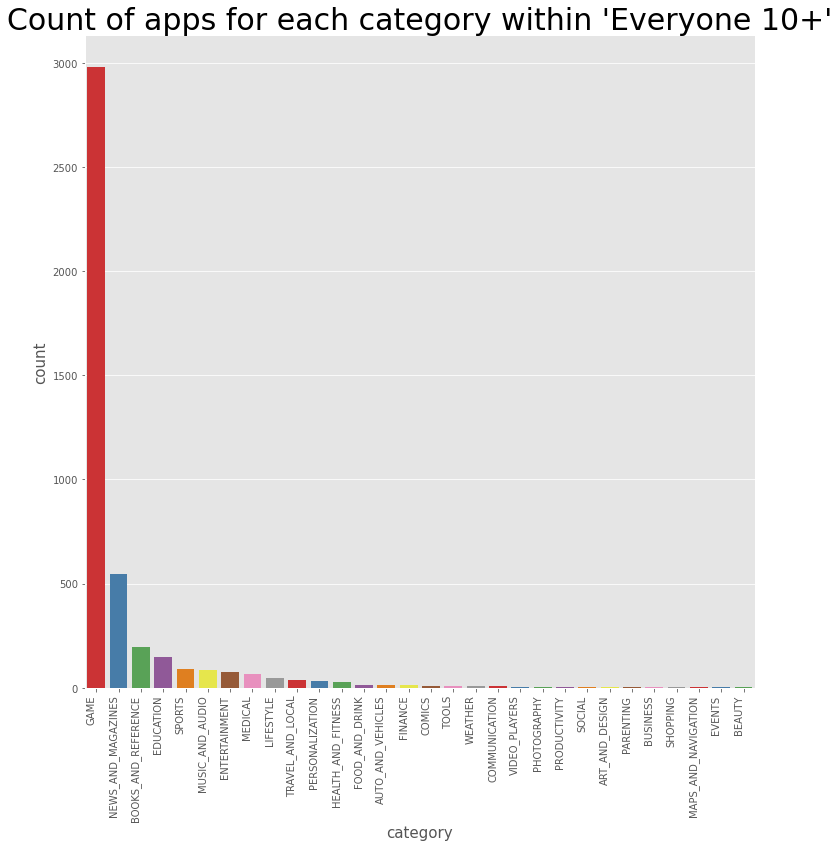

In [37]:
# So, most valued combination is content rating 10+ and category 'GAME'. However, 'EDUCATION' seems to be good as well
# Let's see if there are many on those
df = data[data.contentRating=='Everyone 10+']
g = sns.countplot(x="category",
                  data=df,
                  order=df.groupby('category').category.count().sort_values(ascending=False).index,
                  palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title("Count of apps for each category within 'Everyone 10+'",size = 30)